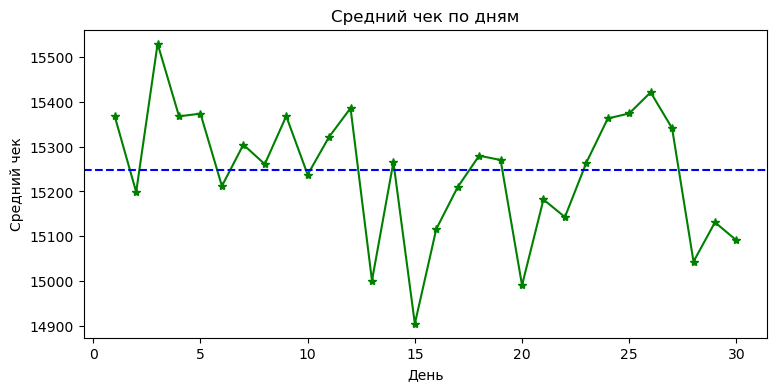

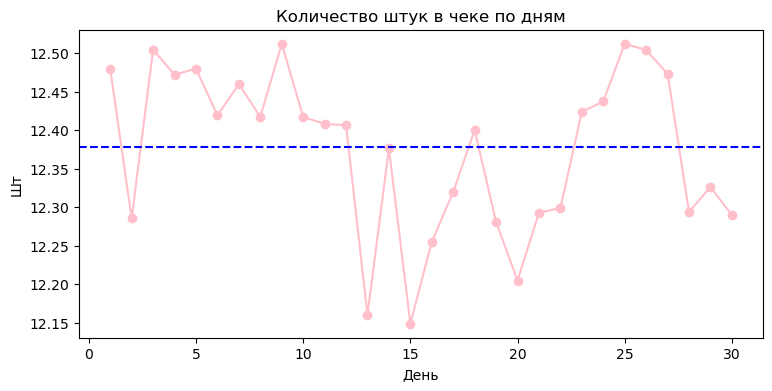

Корреляция между AOV и it_per_ord: 0.91
Средний чек
       TOTAL_REV  ORDERS  ITEMS           AOV  it_per_ord
day                                                      
1    46518039.26    3027  37775  15367.703753   12.479352
2    46599274.48    3066  37667  15198.719661   12.285388
3    45237670.93    2913  36425  15529.581507   12.504291
4    51742758.17    3367  41992  15367.614544   12.471636
5    43706740.96    2843  35480  15373.457953   12.479775
6    40220497.05    2644  32836  15211.988294   12.419062
7    38658763.73    2526  31473  15304.340352   12.459620
8    49933448.85    3272  40629  15260.834001   12.417176
9    52481378.22    3415  42728  15367.899918   12.511859
10   39556644.38    2596  32235  15237.536356   12.417180
11   51189889.81    3341  41455  15321.726971   12.407962
12   36464468.14    2370  29403  15385.851536   12.406329
13   36392257.34    2426  29501  15000.930478   12.160346
14   44346324.51    2905  35953  15265.516182   12.376248
15   39139891.90    

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv('data_sales.csv',sep=';')

# Просмотр первых строк данных
df.head()

# Преобразуем дату в формат datetime
df['DT_ORD']  = pd.to_datetime(df['DT_ORD'], format='%d.%m.%Y')

# Выделим день
df['day'] = df['DT_ORD'].dt.day

# Выделим день недели
df['day_of_week'] =  df['DT_ORD'].dt.day_name()

# Добавим колонку с выручкой
df['revenue'] = df['SALE_SUM'] * df['QUANTITY']

# Рассчитаем выручку, количество заказов, штук

check=df.groupby('day').agg(
    TOTAL_REV=('revenue', 'sum'),
    ORDERS=('ORDNUM', 'nunique'),
    ITEMS=('QUANTITY', 'sum'),    
)

# Добавим колонку со средним чеком и количеством штук в чеке

check['AOV']=check['TOTAL_REV']/check['ORDERS']

check['it_per_ord']=check['ITEMS']/check['ORDERS']

# Рассчитаем средний чек за месяц и количество штук в заказе за месяц

df_AOV=df['revenue'].sum()/df['ORDNUM'].nunique()

df_it_per_ord=df['QUANTITY'].sum()/df['ORDNUM'].nunique()

# Визуализация средний чек
plt.figure(figsize=(30, 4))
plt.subplot(1, 3, 1)
check['AOV'].plot(kind='line', color='green',marker='*', label='Средний чек')

# Добавляем горизонтальную линию среднего
plt.axhline(y=df_AOV, color='blue', linestyle='--', label=f'Среднее: {df_AOV:.2f}' )

plt.title('Средний чек по дням')
plt.xlabel('День')
plt.ylabel('Средний чек')
plt.legend
plt.show()

# Визуализация количество штук в чеке
plt.figure(figsize=(30, 4))
plt.subplot(1, 3, 2)
check['it_per_ord'].plot(kind='line', color='pink',marker='o', label='Количество штук в чеке')

# Добавляем горизонтальную линию среднего
plt.axhline(y=df_it_per_ord, color='blue', linestyle='--', label=f'Среднее: {df_it_per_ord:.2f}' )

plt.title('Количество штук в чеке по дням')
plt.xlabel('День')
plt.ylabel('Шт')
plt.legend
plt.show()

# Рассчитываем корреляцию
correlation = check['AOV'].corr(check['it_per_ord'])
print(f"Корреляция между AOV и it_per_ord: {correlation:.2f}")

print("Средний чек")
print(check, "\n")
print("Средний чек за месяц")
print(df_AOV, "\n")
